In [2]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape and Normalize
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0


In [8]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 63s 35ms/step - accuracy: 0.7921 - loss: 0.6445 - val_accuracy: 0.9813 - val_loss: 0.0612
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9493 - loss: 0.1640 - val_accuracy: 0.9880 - val_loss: 0.0407
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9639 - loss: 0.1185 - val_accuracy: 0.9903 - val_loss: 0.0335
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.9703 - loss: 0.0987 - val_accuracy: 0.9922 - val_loss: 0.0345
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.9762 - loss: 0.0808 - val_accuracy: 0.9900 - val_loss: 0.0357


In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9852 - loss: 0.0387
Test accuracy: 0.9886


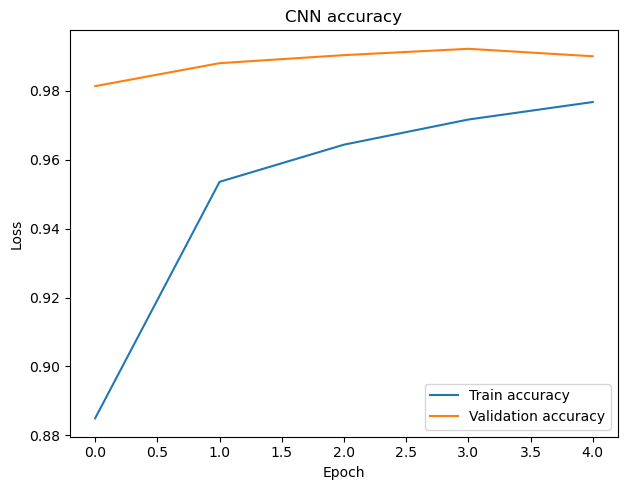

In [15]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


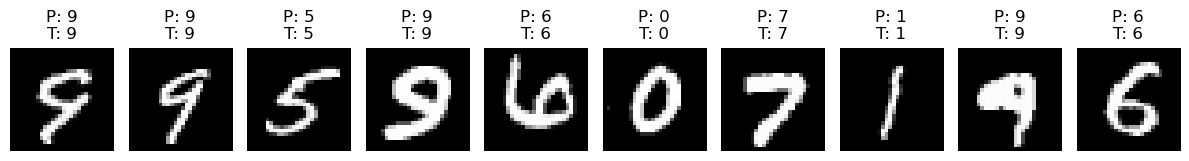

In [16]:
# Visualize random predictions
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1)

indices = random.sample(range(len(X_test)), 10)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"P: {predicted_labels[idx].numpy()}\nT: {y_test[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


